In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [103]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [104]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [105]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [106]:
df.shape

(5110, 12)

In [107]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [108]:
#used to remove extra space, underscore form the column name
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]


In [109]:
#  Clean whitespace and lowercase
df['stroke'] = df['stroke'].astype(str).str.strip().str.lower()

In [110]:
print("Unique values before filtering:\n", df['stroke'].unique())
print("Counts of each:\n", df['stroke'].value_counts(dropna=False))

Unique values before filtering:
 ['1' '0']
Counts of each:
 stroke
0    4861
1     249
Name: count, dtype: int64


In [111]:
df.shape

(5110, 12)

In [112]:
df.shape

(5110, 12)

In [113]:
# Encode categorical features
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna("Unknown")
        df[col] = le.fit_transform(df[col])
    else:
        df[col] = df[col].fillna(df[col].mean())

In [114]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [115]:
print("Duplicate rows removed:", df.duplicated().sum())


Duplicate rows removed: 0


In [116]:
df.shape

(5110, 12)

In [117]:
##Split into feature and target
X = df.drop(['stroke','id'], axis=1)
Y = df['stroke']

In [118]:
print("📊 Class distribution:\n", Y.value_counts(normalize=True))

📊 Class distribution:
 stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64


In [119]:
value_caount = df['stroke'].value_counts()
value_caount


stroke
0    4861
1     249
Name: count, dtype: int64

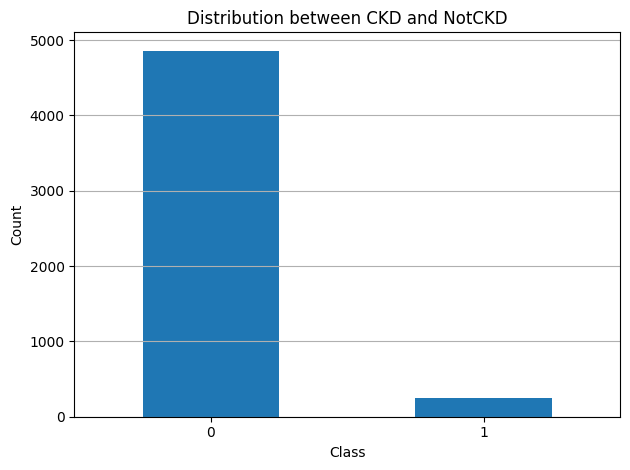

In [120]:
plt.plot(figsize=(2,2))
value_caount.plot(kind='bar')
plt.title("Distribution between CKD and NotCKD")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [121]:
# initialization RandomForestClassifier for best feature selectionin from dataset
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [122]:
rf.fit(X,Y)

RandomForestClassifier(random_state=42)

In [123]:
#top 6 best feature select by RandomForestClassifier
impotant_feature = pd.Series(rf.feature_importances_, index=X.columns)
top_feature = impotant_feature.sort_values(ascending = False).head(6).index.to_list()

In [124]:
impotant_feature.sort_values(ascending = False).head(6)

avg_glucose_level    0.287923
bmi                  0.232799
age                  0.228808
smoking_status       0.072357
work_type            0.049635
residence_type       0.032644
dtype: float64

In [125]:
print(top_feature)

['avg_glucose_level', 'bmi', 'age', 'smoking_status', 'work_type', 'residence_type']


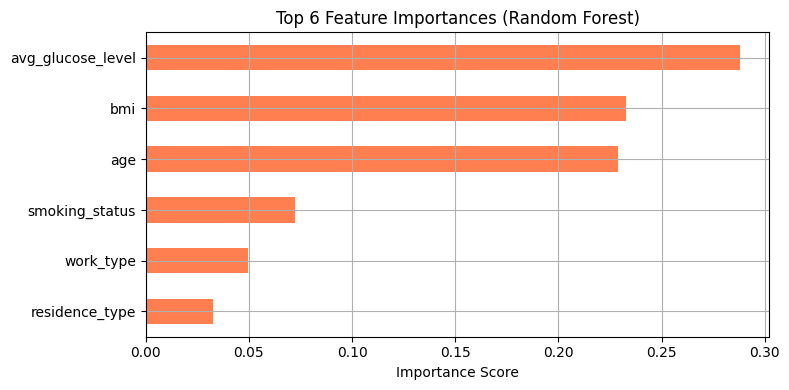

In [126]:
impotant_feature[top_feature].sort_values().plot(kind='barh', figsize=(8, 4), color='coral')
plt.title("Top 6 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.grid(True)
plt.tight_layout()
plt.show()

In [127]:

new_X = X[top_feature]

In [128]:
#make the new csv file of new seleced feature using randomForestClassifier
# pd.concat([new_X, Y], axis =1).to_csv("Top_6_features_with_label.csv", index=False)

In [129]:
new_X

,avg_glucose_level,bmi,age,smoking_status,work_type,residence_type
0,228.69,36.600000,67.0,1,2,1
1,202.21,28.893237,61.0,2,3,0
2,105.92,32.500000,80.0,2,2,0
3,171.23,34.400000,49.0,3,2,1
4,174.12,24.000000,79.0,2,3,0
...,...,...,...,...,...,...
5105,83.75,28.893237,80.0,2,2,1
5106,125.20,40.000000,81.0,2,3,1
5107,82.99,30.600000,35.0,2,3,0
5108,166.29,25.600000,51.0,1,2,0


In [130]:
new_X.isnull().sum()

avg_glucose_level    0
bmi                  0
age                  0
smoking_status       0
work_type            0
residence_type       0
dtype: int64

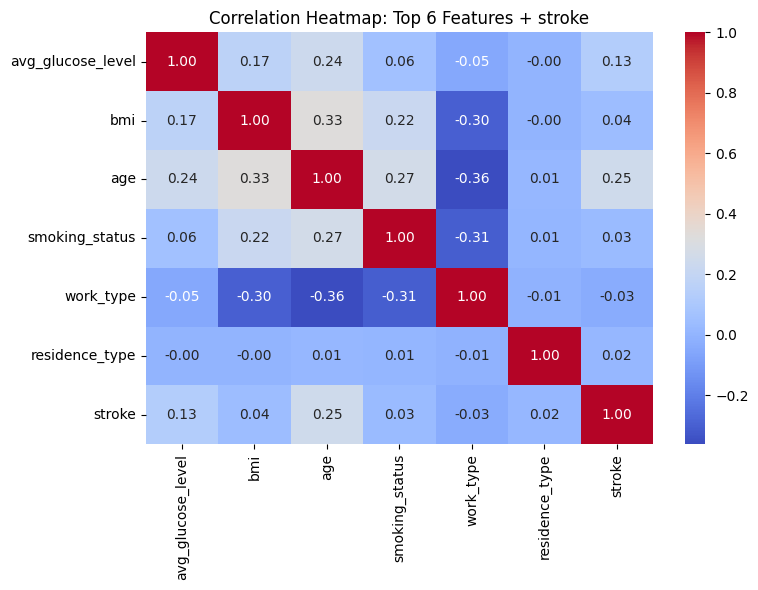

In [131]:
# Combine top 6 features with the target
selected_df = pd.concat([new_X, Y], axis=1)

# Correlation heatmap for selected features
plt.figure(figsize=(8, 6))
sns.heatmap(selected_df.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Heatmap: Top 6 Features + stroke")
plt.tight_layout()
plt.show()


In [132]:
# Train/test split
x_train, x_test, y_train, y_test = train_test_split(new_X, Y, test_size=0.3, stratify=Y, random_state=42)


In [133]:
from imblearn.over_sampling import SMOTE

In [134]:
# Apply SMOTE only to training set
sm = SMOTE(random_state=42)
x_train_sm , y_train_sm = sm.fit_resample(x_train, y_train)

In [135]:
# Model training
stroke_model = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
    n_estimators=100, 
    max_depth=10, 
    min_samples_split=2, 
    min_samples_leaf=1, 
)


In [136]:
# from xgboost import XGBClassifier

# stroke_model = XGBClassifier(
#     scale_pos_weight=len(y_train[y_train==0]) / len(y_train[y_train==1]), # handle imbalance
#     eval_metric='logloss',
#     n_estimators=300,
#     max_depth=6,
#     learning_rate=0.05,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     random_state=42
# )


In [137]:
stroke_model.fit(x_train_sm, y_train_sm)

RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42)

In [139]:
x_train_sm.head()

,avg_glucose_level,bmi,age,smoking_status,work_type,residence_type
0,107.84,22.0,52.0,1,0,0
1,88.32,36.3,62.0,0,2,1
2,95.49,29.4,81.0,0,3,0
3,73.57,28.0,55.0,3,3,0
4,103.66,36.1,37.0,3,2,1


In [140]:
print(x_train_sm.shape, x_train.shape)

(6806, 6) (3577, 6)


In [141]:
print(y_train_sm.shape, y_train.shape)

(6806,) (3577,)


In [142]:
# training_pred = stroke_model.predict(x_train)
training_pred = stroke_model.predict(x_train_sm)

In [143]:
training_accuracy = accuracy_score(y_train_sm, training_pred)

In [144]:
training_accuracy

0.9332941522186307

In [145]:
# Evaluate testing
y_pred = stroke_model.predict(x_test)
test_acc = accuracy_score(y_test, y_pred)

In [146]:
test_acc


0.8075668623613829

In [147]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[1205  253]
 [  42   33]]


In [148]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89      1458
           1       0.12      0.44      0.18        75

    accuracy                           0.81      1533
   macro avg       0.54      0.63      0.54      1533
weighted avg       0.92      0.81      0.86      1533



In [151]:
from joblib import dump


# Save the model to a file
dump(stroke_model, "models/stroke_model.joblib")


['models/stroke_model.joblib']